## Housing Company Case Study

#### Problem Statement :

Surprise Housing is a US-based housing company which has decided to enter the Australian market.
The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. It has collected a data set from the sale of houses in Australia.
The Company is looking for prospective properties to buy in order to enter the market.

The company wants to know :

- Which aspects are significant in predicting the price of a house, and

- How well those aspects describe the price of a house.

#### Objective :

- Build a model to predict the houses with given features which can then be used by the management to understand how exactly the prices vary with the variables in turn helping them to manipulate the startegy of the firm and concentrate on areas that will yield high returns and to understand the pricing dynamics of a new market.

### Importing and Understanding Data

In [88]:
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

# Importing all required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# For Modelling
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score

import os

# To display all the columns and rows
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)

In [89]:
# Importing dataset
housing_data = pd.read_csv("train.csv")
# Check head of the dataset
housing_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [90]:
#Inspect the various aspects of the Housing Dataframe

start = "\033[1m"
end = "\033[0;0m"
print("\n"+start+"Datatype of each Column"+end+"\n")
print(housing_data.info()) # Datatype of each Column
print("\n"+start+"Summary of operations on numeric columns in dataframe"+end+"\n")
print(housing_data.describe()) # Summary of operations on numeric columns in dataframe
print("\n"+start+"Name of the type of collection"+end+"\n")
print(type(housing_data)) # Returns the name of the type of collection
print("\n"+start+"Number rows and columns"+end+"\n")
print(housing_data.shape) # Returns number rows and columns 
print("\n"+start+"Columns present in Dataframe"+end+"\n")
print(housing_data.columns) # Returns the Columns present in Dataframe
print("\n"+start+"Numpy array of nested list of values"+end+"\n")
print(housing_data.values) # Returns the numpy array of nested list of values


Datatype of each Column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-nu

##### Understanding the Data Dictionary

From the data dictionary, we can see that some of the variables are having NA as a meaningful categories which the pandas can treat as missing values if the proper value not assigned.

So, we will replace the NA with appropriate Category Name for such Variables.

In [91]:
# Replacing the NA level in 'Alley'
housing_data['Alley'][housing_data.Alley.isnull()]='No alley access'

# Replacing the NA level in 'BsmtQual'
housing_data['BsmtQual'][housing_data.BsmtQual.isnull()]='No Basement'

# Replacing the NA level in 'BsmtCond'
housing_data['BsmtCond'][housing_data.BsmtCond.isnull()]='No Basement'

# Replacing the NA level in 'BsmtExposure'
housing_data['BsmtExposure'][housing_data.BsmtExposure.isnull()]='No Basement'

# Replacing the NA level in 'BsmtFinType1'
housing_data['BsmtFinType1'][housing_data.BsmtFinType1.isnull()]='No Basement'

# Replacing the NA level in 'BsmtFinType2'
housing_data['BsmtFinType2'][housing_data.BsmtFinType2.isnull()]='No Basement'

# Replacing the NA level in 'FireplaceQu'
housing_data['FireplaceQu'][housing_data.FireplaceQu.isnull()]='No Fireplace'

# Replacing the NA level in 'GarageType'
housing_data['GarageType'][housing_data.GarageType.isnull()]='No Garage'

# Replacing the NA level in 'GarageFinish'
housing_data['GarageFinish'][housing_data.GarageFinish.isnull()]='No Garage'

# Replacing the NA level in 'GarageQual'
housing_data['GarageQual'][housing_data.GarageQual.isnull()]='No Garage'

# Replacing the NA level in 'GarageCond'
housing_data['GarageCond'][housing_data.GarageCond.isnull()]='No Garage'

# Replacing the NA level in 'PoolQC'
housing_data['PoolQC'][housing_data.PoolQC.isnull()]='No Pool'

# Replacing the NA level in 'Fence'
housing_data['Fence'][housing_data.Fence.isnull()]='No Fence'

# Replacing the NA level in 'MiscFeature'
housing_data['MiscFeature'][housing_data.MiscFeature.isnull()]='None'

From the data dictionary, we see that we have four year columns namely `YearBuilt`, `YearRemodAdd`, `GarageYrBlt` and `YrSold`. Out of them, we can use `YearBuilt` to find out the age of the Building.

In [92]:
# Finding the age of the building 

from datetime import date

housing_data['BuildingAge']= date.today().year - housing_data['YearBuilt']

We can check the behaviour of other date variables w.r.t Target Variable

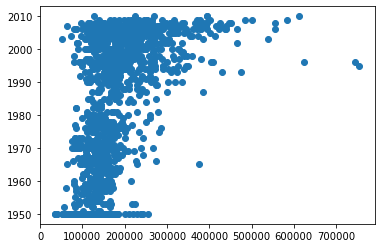

In [93]:
# Plotting Scatter plot between SalePrice and YearRemodAdd

plt.scatter(housing_data['SalePrice'], housing_data['YearRemodAdd'])

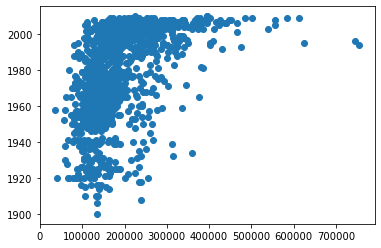

In [94]:
# Plotting Scatter plot between SalePrice and GarageYrBlt

plt.scatter(housing_data['SalePrice'], housing_data['GarageYrBlt'])

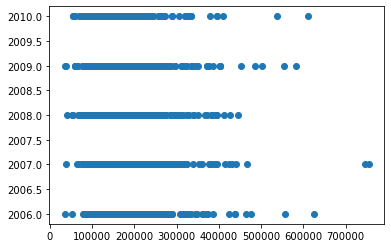

In [95]:
# Plotting Scatter plot between SalePrice and YrSold

plt.scatter(housing_data['SalePrice'], housing_data['YrSold'])

From the above three scatter plots, we can see that the columns doesn't tend to show any notable trend. Hence, these columns can be dropped.

In [96]:
# Dropping `YearRemodAdd`, `GarageYrBlt` and `YrSold`

housing_data.drop(['YearRemodAdd','GarageYrBlt','YrSold'],inplace=True,axis=1)

In [97]:
# Remove 'YearBuilt' as we have the Building Age now

housing_data.drop(['YearBuilt'],inplace=True,axis=1)

###### We will check the missing values % in each of the variables and delete the column if the column has high % of it. And, impute the values for the ones who have very few missing data with appropriate imputing method.

In [98]:
# Finding the % of Missing values in each column

round((100*(housing_data.isnull().sum())/len(housing_data.index)),2)

Id                0.00
MSSubClass        0.00
MSZoning          0.00
LotFrontage      17.74
LotArea           0.00
Street            0.00
Alley             0.00
LotShape          0.00
LandContour       0.00
Utilities         0.00
LotConfig         0.00
LandSlope         0.00
Neighborhood      0.00
Condition1        0.00
Condition2        0.00
BldgType          0.00
HouseStyle        0.00
OverallQual       0.00
OverallCond       0.00
RoofStyle         0.00
RoofMatl          0.00
Exterior1st       0.00
Exterior2nd       0.00
MasVnrType        0.55
MasVnrArea        0.55
ExterQual         0.00
ExterCond         0.00
Foundation        0.00
BsmtQual          0.00
BsmtCond          0.00
BsmtExposure      0.00
BsmtFinType1      0.00
BsmtFinSF1        0.00
BsmtFinType2      0.00
BsmtFinSF2        0.00
BsmtUnfSF         0.00
TotalBsmtSF       0.00
Heating           0.00
HeatingQC         0.00
CentralAir        0.00
Electrical        0.07
1stFlrSF          0.00
2ndFlrSF          0.00
LowQualFinS

As we can see from above result that, none of the variables are showing high % of missing value. So, for the variables which are having low % of missing value, we will impute them.

Before imputing, we will first check the appropriate way of imputing.

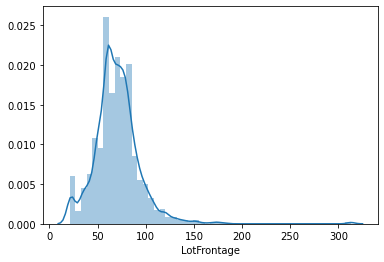

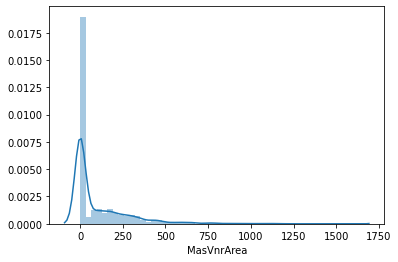

In [99]:
# Plotting distplot for the missing value continuous variables.

# independent variable: LotFrontage
sns.distplot(housing_data['LotFrontage'])
plt.show()

# independent variable: MasVnrArea
sns.distplot(housing_data['MasVnrArea'])
plt.show()

From above graphs, we can see that all three continuous variables are not normally distributed and hence if taken Mean as imputting measure, it will affect the overall outcome. So, we will go with Median to impute the missing values

In [100]:
# Imputing median for missing values in LotFrontage
housing_data['LotFrontage'].fillna(housing_data['LotFrontage'].median(), inplace=True)

# Imputing median for missing values in MasVnrArea
housing_data['MasVnrArea'].fillna(housing_data['MasVnrArea'].median(), inplace=True)

For Categorical variable missing, we can use Mode to impute.

In [101]:
# Imputing mode for missing values : MasVnrType
housing_data['MasVnrType'].fillna(housing_data['MasVnrType'].mode()[0], inplace=True)

# Imputing mode for missing values : Electrical
housing_data['Electrical'].fillna(housing_data['Electrical'].mode()[0], inplace=True)

###### We can check the performance of different variables and their data distribution.

###### Categorical univariate analysis

Checking the bar graph for below columns.
- Alley
- LandContour
- BldgType
- Electrical
- Heating

###### `Bar Plot`

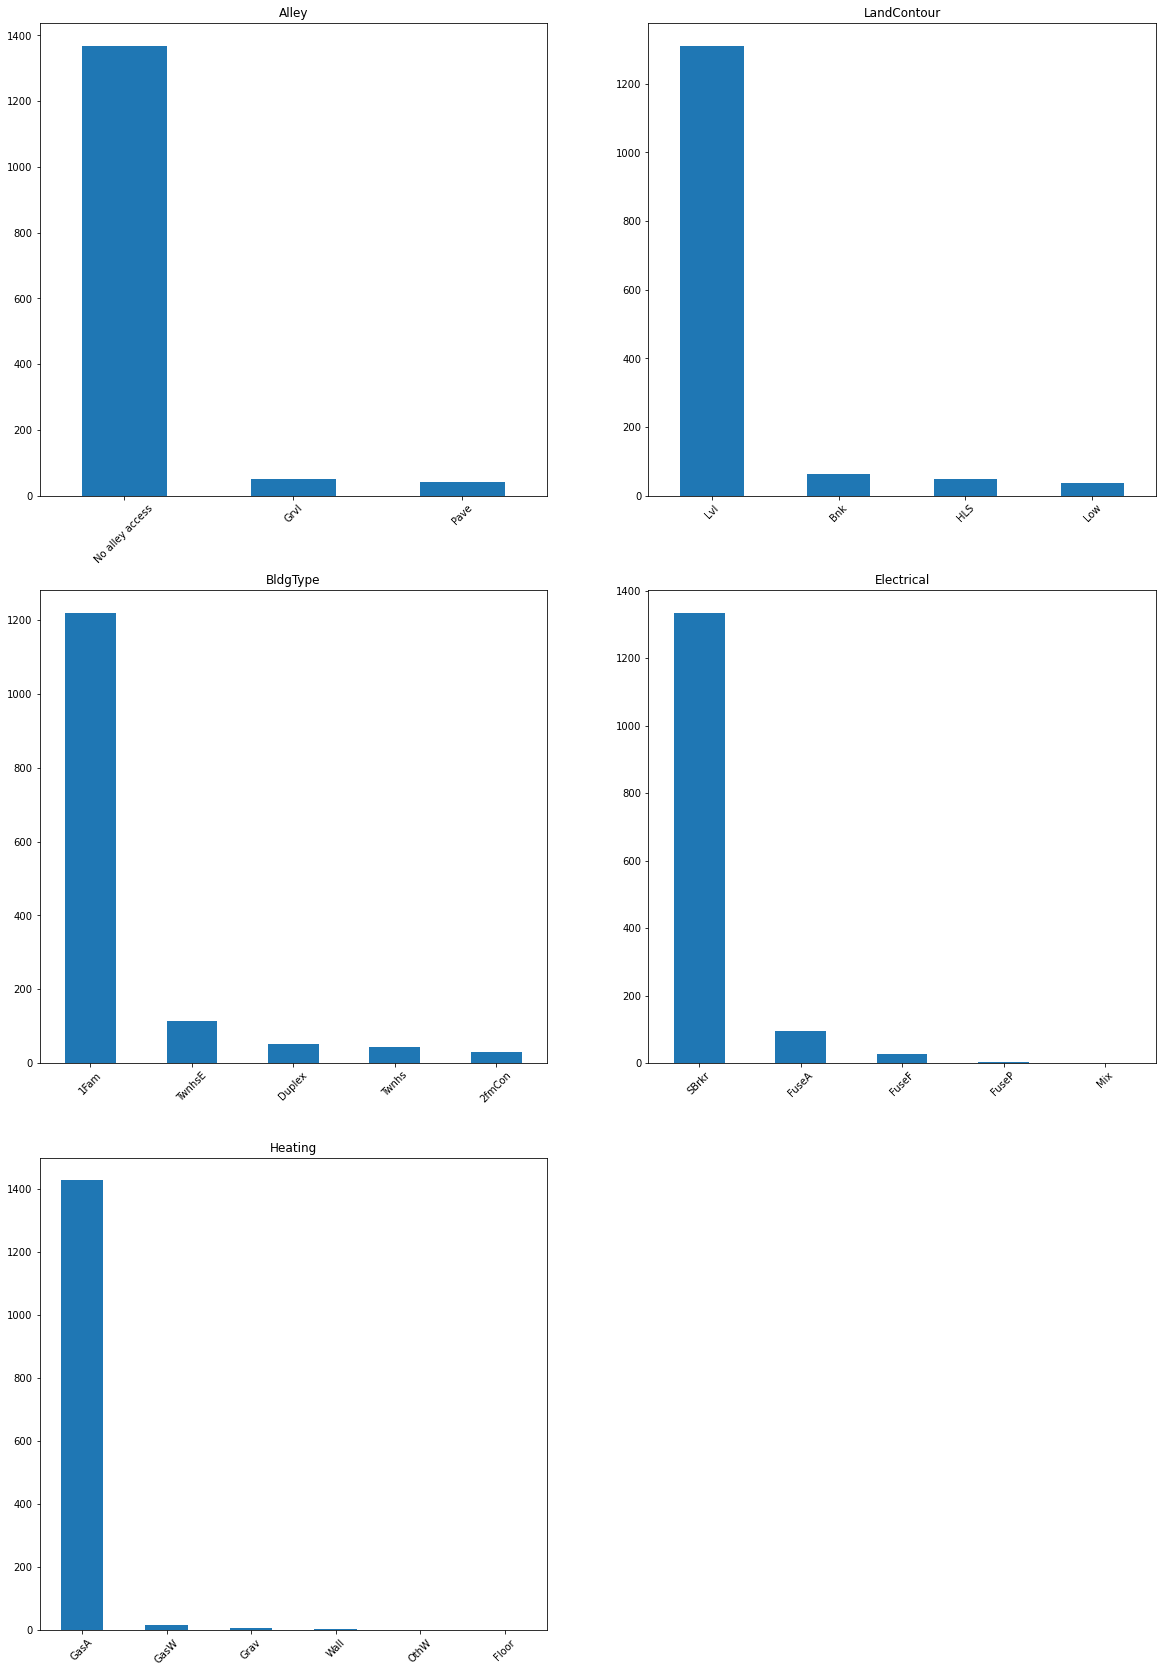

In [102]:
# Plotting bar plots

plt.figure(figsize = (20,40))
features = ['Alley','LandContour','BldgType','Electrical','Heating']
for i in enumerate(features):
    plt.subplot(4,2,i[0]+1)
    housing_data[i[1]].value_counts().plot(kind='bar')
    plt.xticks(Rotation='45')
    plt.title(i[1])

So, after viewing the bar plots of the variables, we can draw following inferences : 

- <b>Alley</b>: Most of the properties are not having alley access.
- <b>LandContour</b>: Most of the properties are built on the leveled area compared to the ones on Banks, Hilly Area and in the valleys.
- <b>BldgType</b>: We can see that most of the buildings are built keeping single family size in mind.
- <b>Electrical</b>: Most of the buildings are having `Standard Circuit Breakers & Romex` as their electrical system.
- <b>Heating</b>: The type of heating in 99% of the buidings is `Gas forced warm air furnace`.

###### Categorical-Numerical bivariate analysis

###### `Scatter Plot`

We can see the variance in the categories of Categorical Column w.r.t SalePrice

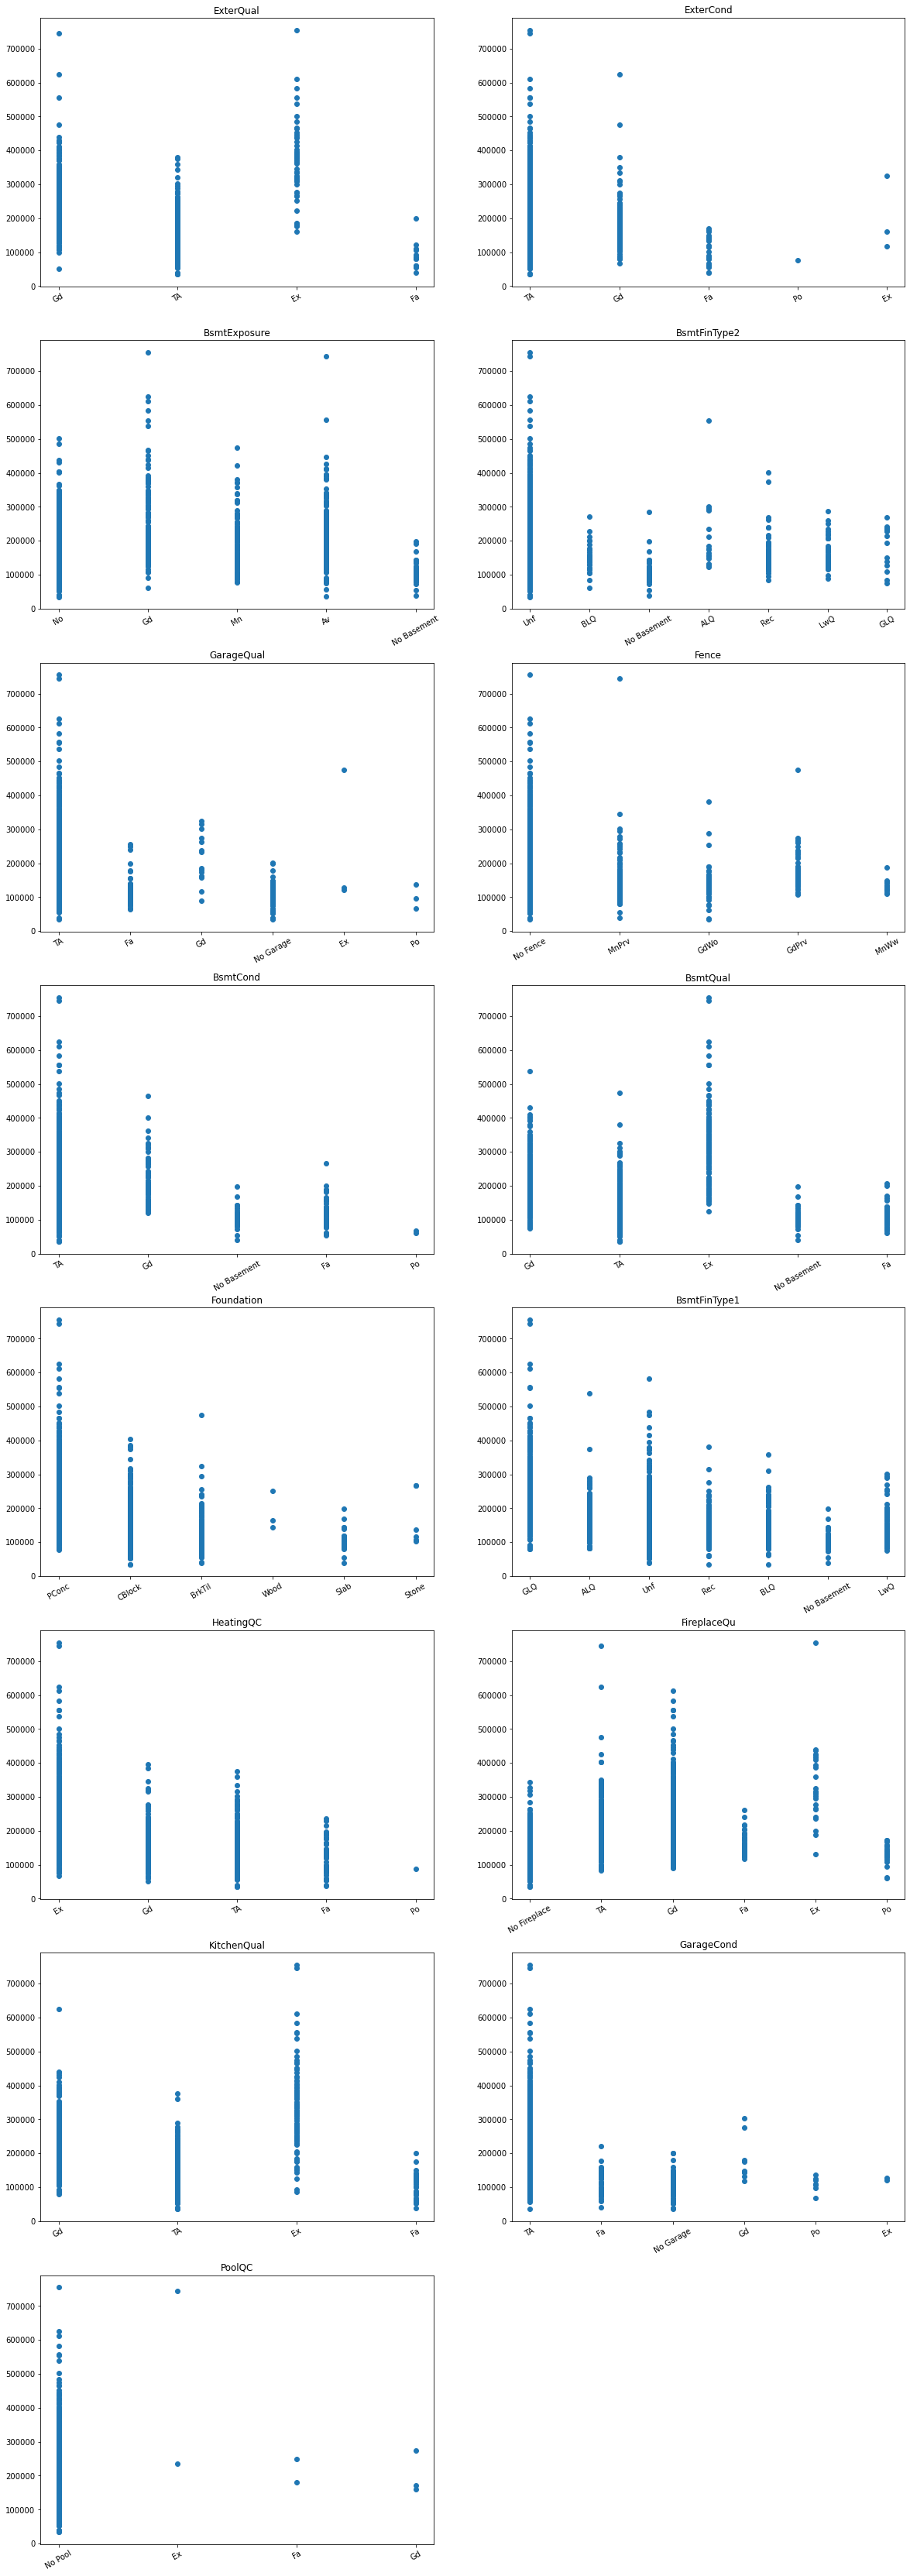

In [103]:
# We can plot mutiple categorical columns with respect to SalePrice columns: Subplot

columns = ['ExterQual','ExterCond','BsmtExposure','BsmtFinType2','GarageQual','Fence','BsmtCond','BsmtQual','Foundation','BsmtFinType1','HeatingQC','FireplaceQu','KitchenQual','GarageCond','PoolQC']


plt.figure(figsize = (20, 60))
for i in enumerate(columns):
    plt.subplot(8, 2, i[0]+1)
    plt.scatter(x = i[1], y = 'SalePrice', data = housing_data)
    plt.title(i[1])
    plt.xticks(rotation = 30)
    

From above plots, we can say that the dataframe consists of few Categorical Columns that are ordinal w.r.t SalePrice. 
They are : `ExterQual`,`BsmtQual`,`HeatingQC`,`KitchenQual`
We can do manual label encoding for these type of columns.

In [104]:
# Mapping NA as 0, Po as 1 ,Fa as 2 ,TA as 3 , Gd as 4 and Ex as 5
# Since we have already replaced NA with appropriate values, we can assign 0 to any value other than Po,Fa,TA,Gd and Ex

columns = ['ExterQual','BsmtQual','HeatingQC','KitchenQual']

def MapValuetoQuality(x):
    if x=='Po':
        return 1
    elif x=='Fa':
        return 2
    elif x=='TA':
        return 3
    elif x=='Gd':
        return 4
    elif x=='Ex':
        return 5
    else:
        return 0

# Applying the function to ExterQual,BsmtQual,HeatingQC and KitchenQual
housing_data['ExterQual'] = housing_data['ExterQual'].apply(MapValuetoQuality)
housing_data['BsmtQual'] = housing_data['BsmtQual'].apply(MapValuetoQuality)
housing_data['HeatingQC'] = housing_data['HeatingQC'].apply(MapValuetoQuality)
housing_data['KitchenQual'] = housing_data['ExterQual'].apply(MapValuetoQuality)

##### Numerical univariate analysis

###### `Density Plot`

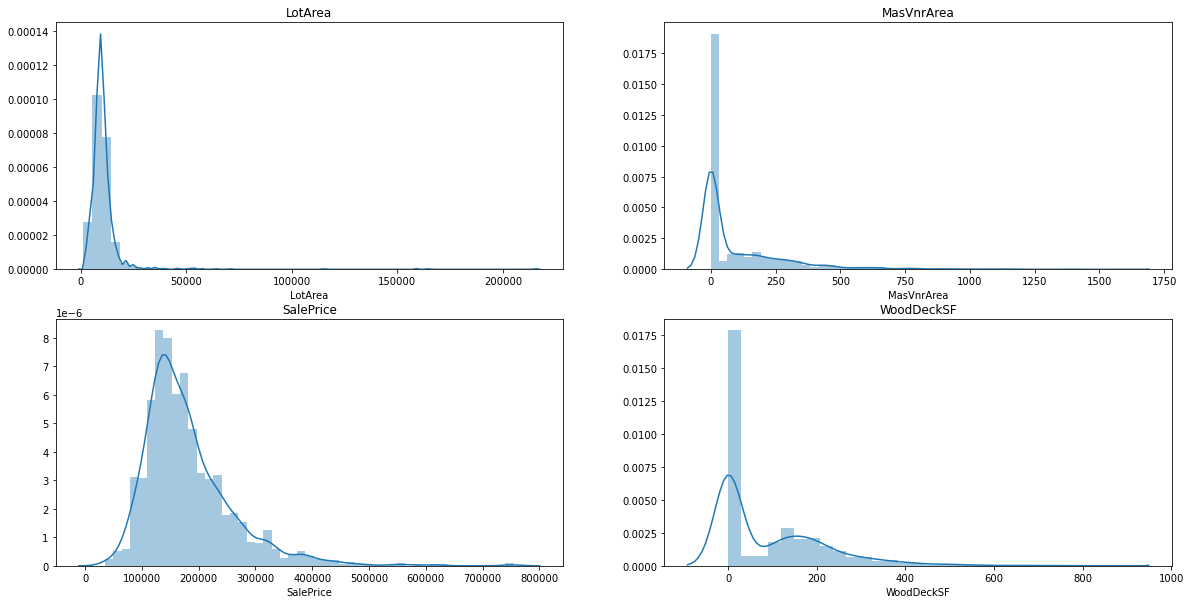

In [105]:
# figure size
plt.figure(figsize=(20,10))

# plot the density plot of percentage 'LotArea'
plt.subplot(2, 2, 1)
plt.title('LotArea')
sns.distplot(housing_data['LotArea'], hist = True)

#plot the density plot of percentage 'MasVnrArea' categories
plt.subplot(2, 2, 2)
plt.title('MasVnrArea')
sns.distplot(housing_data['MasVnrArea'], hist = True)


#plot the density plot of percentage 'SalePrice' categories
plt.subplot(2, 2, 3)
plt.title('SalePrice')
sns.distplot(housing_data['SalePrice'], hist = True)

#plot the density plot of percentage 'WoodDeckSF' categories
plt.subplot(2, 2, 4)
plt.title('WoodDeckSF')
sns.distplot(housing_data['WoodDeckSF'], hist = True)


plt.show()


From above density plot we see that, none of the variables plotted have normal distribution and show skewed nature which indicates presence of Outliers. We can treat outliers here by keeping in mind that these outliers are very important as we need to check the extreme values as well and if we cap or impute outliers, we may end up loosing some crucial data.

###### Bivariate analysis on Numerical- Numerical variables.

###### `Correlation matrix`

In [106]:
# Checking correlation between the variables
corr = housing_data.corr()
corr = corr.where(np.triu(np.ones(corr.shape),k=1).astype(np.bool))
corr_day = corr.unstack().reset_index()
corr_day.columns=['Variable1','Variable2','Correlation']
corr_day.dropna(subset=['Correlation'],inplace=True)
corr_day.Correlation = round(abs(corr_day['Correlation']),4)
corr_day.sort_values(by='Correlation', ascending=False)

,Variable1,Variable2,Correlation
1119,GarageArea,GarageCars,0.8825
992,TotRmsAbvGrd,GrLivArea,0.8255
558,1stFlrSF,TotalBsmtSF,0.8195
1447,SalePrice,OverallQual,0.7910
277,ExterQual,OverallQual,0.7263
1460,SalePrice,GrLivArea,0.7086
678,GrLivArea,2ndFlrSF,0.6875
1450,SalePrice,ExterQual,0.6826
997,TotRmsAbvGrd,BedroomAbvGr,0.6766
711,BsmtFullBath,BsmtFinSF1,0.6492


We can see that the variables <b>'GarageArea' and 'GarageCars'</b>,<b>'TotRmsAbvGrd' and 'GrLivArea'</b> & <b>'1stFlrSF' and 'TotalBsmtSF'</b> have very high correlation and variables <b>'3SsnPorch' and 'BsmtFullBath	'</b> have the least correlation.

We can also observe that target variable <b>'SalePrice' has highest correlation with 'OverallQual'</b>

###### `Heat Map`

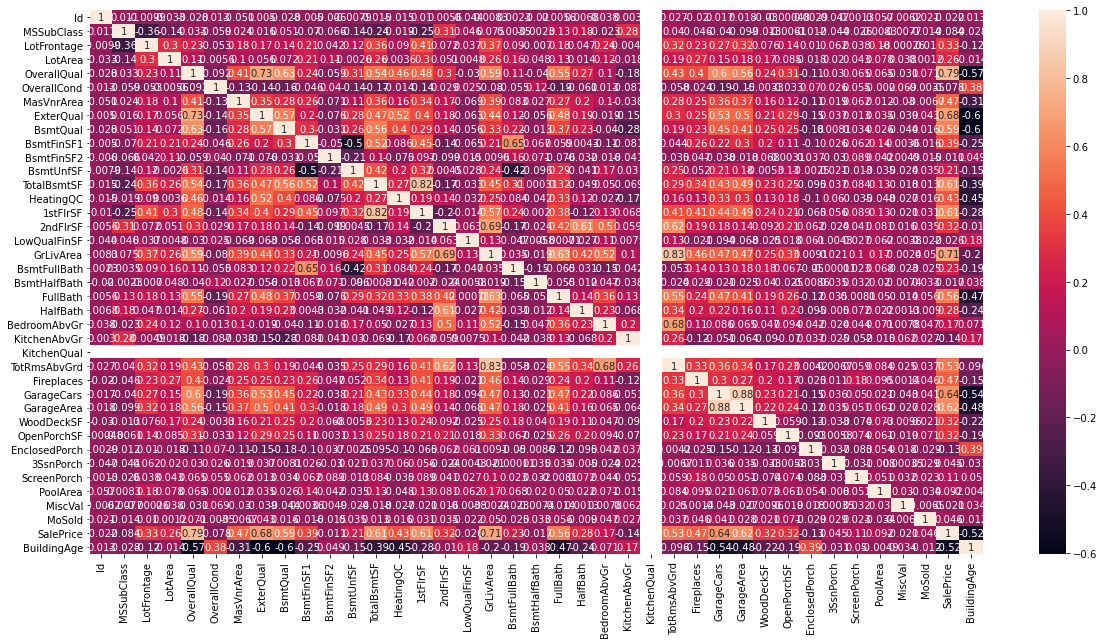

In [107]:
# Let's see the correlation matrix 
plt.figure(figsize = (20,10))        # Size of the figure
sns.heatmap(housing_data.corr(),annot = True)
plt.show()

The correlation values calculated and observed can be picturised from the above heat map.

###### `Pair Plot`

We can see the variance of other numerical variables with respect to target variable 'SalePrice'

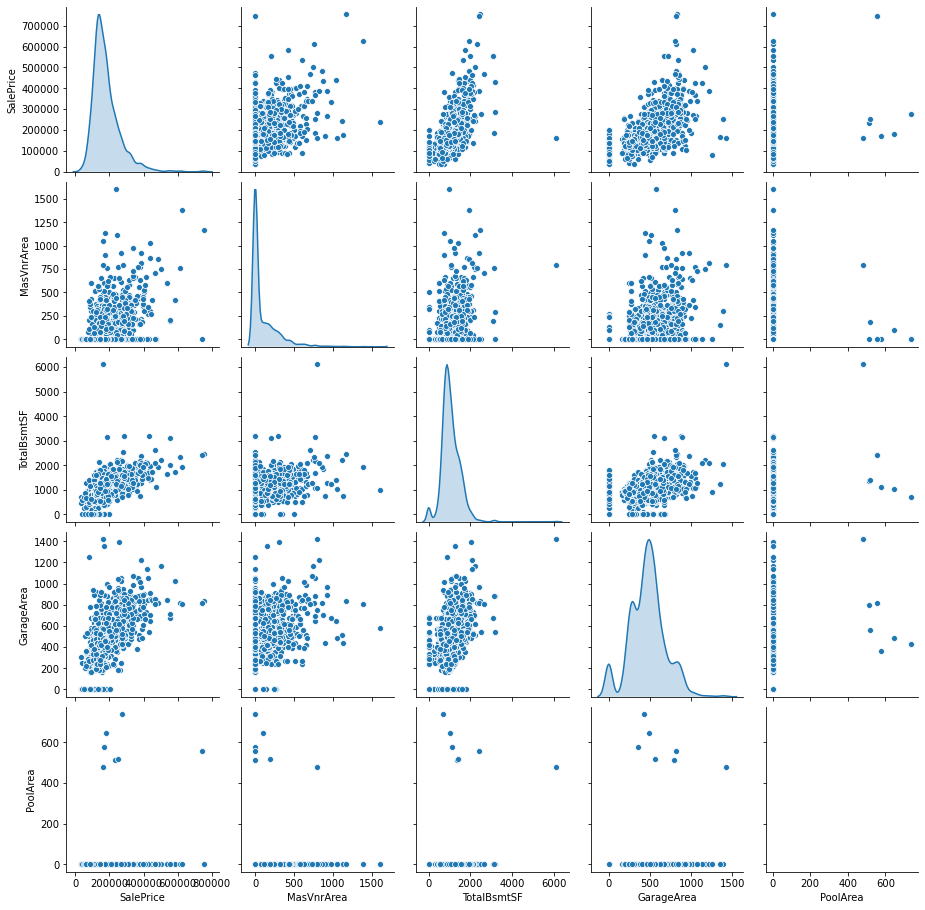

In [108]:
# Pair plot
sns.pairplot(housing_data[['SalePrice','MasVnrArea','TotalBsmtSF','GarageArea','PoolArea']],diag_kind='kde')

From the above plots we see that these variables doesn't fall linearly with the Target Variable SalePrice.

###### Outlier Analysis and Treatment

Here, we will check SalePrice for Outlier and we will do the proper imputation/treatment if any.

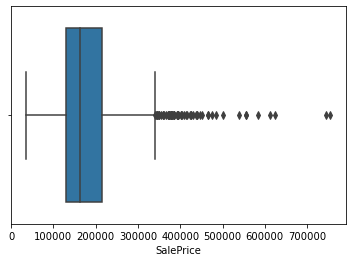

In [109]:
# Plotting box plots of the SalePrice to see if there are any outliers
sns.boxplot(housing_data.SalePrice)
plt.show()

As we can see from above box plot that there are outliers present. We cannot impute these outliers nor we can cap them because then we will be loosing on the information of the properties with high price.

So, we will do transformation of the SalePrice.
We will do the Quantile, box-cox and log tranformation on SalePrice column and select the best out of them ( The one which will solve outlier problem as well as the skewness).

In [110]:
# Quantile Transformation

from sklearn.preprocessing import QuantileTransformer

y = pd.DataFrame(housing_data.SalePrice);

scaler = QuantileTransformer()

y_trans= scaler.fit_transform(y)

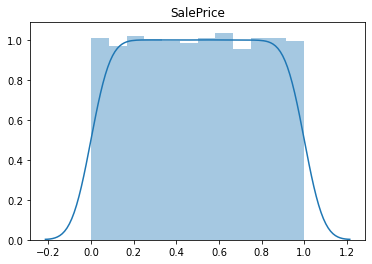

In [111]:
# Plotting the SalePrice after transformation using Quantile
plt.title('SalePrice')
sns.distplot(y_trans, hist = True)

As we can see from the plot, we have surely taken care of the Outliers but for the normality, it doesn't seem much effective.

We can try performing power transformation

In [112]:
# Power Transformation using Box-cox

from sklearn.preprocessing import PowerTransformer
scaler_1 = PowerTransformer(method = 'box-cox')

y_trans= scaler.fit_transform(y)

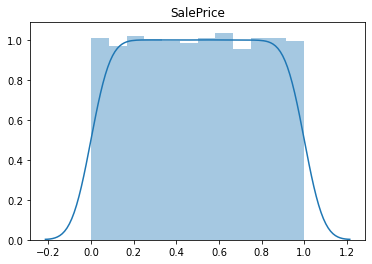

In [113]:
# Plotting the SalePrice after transformation using PowerTransformtion

plt.title('SalePrice')
sns.distplot(y_trans, hist = True)

Like Quantile Transformation, we can see from the plot that, we have surely taken care of the Outliers but for the normality, it doesn't seem much effective.

We can also plot for Log Tranformation and see the behaviour

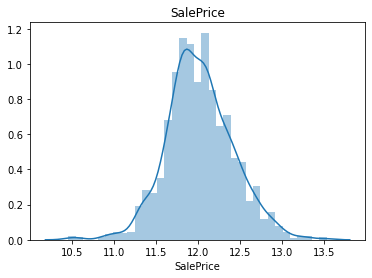

In [114]:
# Tranformation using Log Transformer

y_transform= np.log(housing_data['SalePrice'])
plt.title('SalePrice')
sns.distplot(y_transform, hist = True)

The log tranformation is looking much effective to bring out normality as well as the outlier treatment to allowable extent. Hence, we can go with Log Tranformation.

### Data Preparation

###### Dummy Variables

We can convert the categorical into numerical in a non ordinal manner to make the linear regression efficient.
We can use get_dummies function of pandas or we can also use one hot coding as well.
Here, we will use get_dummies

In [115]:
# split into X and y

y = housing_data.pop('SalePrice')
housing_data.pop('Id') #Id is not required
X = housing_data

In [116]:
# creating dummy variables for categorical variables

# subset all categorical variables
housing_data_categorical = housing_data.select_dtypes(include=['object'])
housing_data_categorical.head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterCond,Foundation,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,CentralAir,Electrical,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,No alley access,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,TA,PConc,TA,No,GLQ,Unf,GasA,Y,SBrkr,Typ,No Fireplace,Attchd,RFn,TA,TA,Y,No Pool,No Fence,None,WD,Normal
1,RL,Pave,No alley access,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,TA,CBlock,TA,Gd,ALQ,Unf,GasA,Y,SBrkr,Typ,TA,Attchd,RFn,TA,TA,Y,No Pool,No Fence,None,WD,Normal
2,RL,Pave,No alley access,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,TA,PConc,TA,Mn,GLQ,Unf,GasA,Y,SBrkr,Typ,TA,Attchd,RFn,TA,TA,Y,No Pool,No Fence,None,WD,Normal
3,RL,Pave,No alley access,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,BrkTil,Gd,No,ALQ,Unf,GasA,Y,SBrkr,Typ,Gd,Detchd,Unf,TA,TA,Y,No Pool,No Fence,None,WD,Abnorml
4,RL,Pave,No alley access,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,TA,PConc,TA,Av,GLQ,Unf,GasA,Y,SBrkr,Typ,TA,Attchd,RFn,TA,TA,Y,No Pool,No Fence,None,WD,Normal


In [117]:
# convert into dummies
housing_data_dummies = pd.get_dummies(housing_data_categorical, drop_first=True)
housing_data_dummies.head()

,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_No alley access,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtCond_Gd,BsmtCond_No Basement,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_No Basement,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_No Basement,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_No Basement,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_No Fireplace,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_No Garage,GarageFinish_No Garage,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_No Garage,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_No Garage,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,PoolQC_Fa,PoolQC_Gd,PoolQC_No Pool,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_No Fence,MiscFeature_None,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,1,0,1,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,0,0,1,0,1,1,0,0,0,1,0

In [118]:
# drop categorical variables 
X = X.drop(list(housing_data_categorical.columns), axis=1)

In [119]:
# concat dummy variables with housing_data
X = pd.concat([X, housing_data_dummies], axis=1)

###### Scaling the variables
As it can be seen in the dataframe, that the values of all the variables are not in same scale, so the coeffcients seems to vary alot for small scale and large scale variables.

To overcome this, we scale the numeric columns of the dataframe
We can use MinMax or Standardisation methods to scale the variables.

In [120]:
from sklearn.preprocessing import MinMaxScaler #Library used for MinMax

scaler = MinMaxScaler()
cols = X.columns
X = pd.DataFrame(scaler.fit_transform(X))
X.columns = cols

In [121]:
# Columns after Scaling
X.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,ExterQual,BsmtQual,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,BuildingAge,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_No alley access,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtCond_Gd,BsmtCond_No Basement,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_No Basement,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_No Basement,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_No Basement,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_No Fireplace,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_No Garage,GarageFinish_No Garage,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_No Garage,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_No Garage,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,PoolQC_Fa,PoolQC_Gd,PoolQC_No Pool,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_No Fence,MiscFeature_None,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0.235294,0.150685,0.033420,0.666667,0.

In [122]:
X.shape

(1460, 246)

###### Splitting the data into Train and Test sets

In [123]:
# The first basic step for regression is performing a train-test split.

from sklearn.model_selection import train_test_split

# We specify seed, so that the train and test data set always have the same rows, respectively
np.random.seed(0)

X_train, X_test, y_train, y_test = train_test_split(X, y_transform, 
                                                    train_size=0.7,
                                                    test_size = 0.3, random_state=100)

### Model Building and Evaluation

Here we will use `RFE(Recursive Feature Elimination)` approach to first identify the top 100 variables and then drill down using statsmodel to come to final set of variables.

In [124]:
# Importing RFE
from sklearn.feature_selection import RFE

##### `RFE for Ridge Regression`

In [125]:
# Running RFE with the output number of the variable equal to 100
lm = Ridge()
lm.fit(X_train, y_train) # Fisrt fit all the collumns into the model

rfe = RFE(lm, 100)             # running RFE by passing the model with the number of variables requirred.
rfe = rfe.fit(X_train, y_train)

In [126]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_)) # To check the columns which RFE has selected

[('MSSubClass', True, 1),
 ('LotFrontage', False, 138),
 ('LotArea', True, 1),
 ('OverallQual', True, 1),
 ('OverallCond', True, 1),
 ('MasVnrArea', False, 137),
 ('ExterQual', True, 1),
 ('BsmtQual', True, 1),
 ('BsmtFinSF1', True, 1),
 ('BsmtFinSF2', False, 29),
 ('BsmtUnfSF', True, 1),
 ('TotalBsmtSF', True, 1),
 ('HeatingQC', True, 1),
 ('1stFlrSF', True, 1),
 ('2ndFlrSF', True, 1),
 ('LowQualFinSF', False, 6),
 ('GrLivArea', True, 1),
 ('BsmtFullBath', True, 1),
 ('BsmtHalfBath', False, 108),
 ('FullBath', True, 1),
 ('HalfBath', True, 1),
 ('BedroomAbvGr', False, 4),
 ('KitchenAbvGr', True, 1),
 ('KitchenQual', False, 143),
 ('TotRmsAbvGrd', True, 1),
 ('Fireplaces', False, 38),
 ('GarageCars', True, 1),
 ('GarageArea', True, 1),
 ('WoodDeckSF', True, 1),
 ('OpenPorchSF', False, 27),
 ('EnclosedPorch', True, 1),
 ('3SsnPorch', True, 1),
 ('ScreenPorch', True, 1),
 ('PoolArea', False, 130),
 ('MiscVal', False, 50),
 ('MoSold', False, 136),
 ('BuildingAge', True, 1),
 ('MSZoning_FV

Here, the columns with rfe ranking as 1 are the ones which RFE has selected as top 100 and rest of the ranking increases as the correlation of that variable to target variable decreases.

In [127]:
col = X_train.columns[rfe.support_] # The columns ssupported by RFE
col

Index(['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'ExterQual',
       'BsmtQual', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC',
       '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath',
       'HalfBath', 'KitchenAbvGr', 'TotRmsAbvGrd', 'GarageCars', 'GarageArea',
       'WoodDeckSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch',
       'BuildingAge', 'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL',
       'MSZoning_RM', 'LotShape_IR3', 'LandContour_HLS', 'LandContour_Low',
       'LandContour_Lvl', 'Utilities_NoSeWa', 'LotConfig_CulDSac',
       'Neighborhood_BrDale', 'Neighborhood_ClearCr', 'Neighborhood_Crawfor',
       'Neighborhood_Edwards', 'Neighborhood_IDOTRR', 'Neighborhood_MeadowV',
       'Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'Neighborhood_SWISU',
       'Neighborhood_Somerst', 'Neighborhood_StoneBr', 'Neighborhood_Veenker',
       'Condition1_Norm', 'Condition1_PosA', 'Condition1_RRAe',
       'Condition1_RRAn', 'Condition2_Feedr', 'C

In [128]:
# The columns not selected by RFE
X_train.columns[~rfe.support_]

Index(['LotFrontage', 'MasVnrArea', 'BsmtFinSF2', 'LowQualFinSF',
       'BsmtHalfBath', 'BedroomAbvGr', 'KitchenQual', 'Fireplaces',
       'OpenPorchSF', 'PoolArea',
       ...
       'Fence_No Fence', 'MiscFeature_None', 'MiscFeature_Shed',
       'MiscFeature_TenC', 'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_Oth',
       'SaleType_WD', 'SaleCondition_Alloca', 'SaleCondition_Family'],
      dtype='object', length=146)

In [129]:
# Creating X_train dataframe with RFE selected variables (Filtering out the rest of the columns)
X_train_ridge_rfe = X_train[col]

###### `RFE for Lasso Regression`

In [130]:
# Running RFE with the output number of the variable equal to 100
lm = Lasso()
lm.fit(X_train, y_train) # Fisrt fit all the collumns into the model

rfe = RFE(lm, 100)             # running RFE by passing the model with the number of variables requirred.
rfe = rfe.fit(X_train, y_train)

In [131]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_)) # To check the columns which RFE has selected

[('MSSubClass', False, 147),
 ('LotFrontage', False, 146),
 ('LotArea', False, 145),
 ('OverallQual', False, 144),
 ('OverallCond', False, 143),
 ('MasVnrArea', False, 142),
 ('ExterQual', False, 141),
 ('BsmtQual', False, 140),
 ('BsmtFinSF1', False, 139),
 ('BsmtFinSF2', False, 138),
 ('BsmtUnfSF', False, 137),
 ('TotalBsmtSF', False, 136),
 ('HeatingQC', False, 135),
 ('1stFlrSF', False, 134),
 ('2ndFlrSF', False, 133),
 ('LowQualFinSF', False, 132),
 ('GrLivArea', False, 131),
 ('BsmtFullBath', False, 130),
 ('BsmtHalfBath', False, 129),
 ('FullBath', False, 128),
 ('HalfBath', False, 127),
 ('BedroomAbvGr', False, 126),
 ('KitchenAbvGr', False, 125),
 ('KitchenQual', False, 124),
 ('TotRmsAbvGrd', False, 123),
 ('Fireplaces', False, 122),
 ('GarageCars', False, 121),
 ('GarageArea', False, 120),
 ('WoodDeckSF', False, 119),
 ('OpenPorchSF', False, 118),
 ('EnclosedPorch', False, 117),
 ('3SsnPorch', False, 116),
 ('ScreenPorch', False, 115),
 ('PoolArea', False, 114),
 ('MiscVal',

In [132]:
col = X_train.columns[rfe.support_] # The columns ssupported by RFE
col

Index(['Exterior2nd_Wd Sdng', 'Exterior2nd_Wd Shng', 'MasVnrType_BrkFace',
       'MasVnrType_None', 'MasVnrType_Stone', 'ExterCond_Fa', 'ExterCond_Gd',
       'ExterCond_Po', 'ExterCond_TA', 'Foundation_CBlock', 'Foundation_PConc',
       'Foundation_Slab', 'Foundation_Stone', 'Foundation_Wood', 'BsmtCond_Gd',
       'BsmtCond_No Basement', 'BsmtCond_Po', 'BsmtCond_TA', 'BsmtExposure_Gd',
       'BsmtExposure_Mn', 'BsmtExposure_No', 'BsmtExposure_No Basement',
       'BsmtFinType1_BLQ', 'BsmtFinType1_GLQ', 'BsmtFinType1_LwQ',
       'BsmtFinType1_No Basement', 'BsmtFinType1_Rec', 'BsmtFinType1_Unf',
       'BsmtFinType2_BLQ', 'BsmtFinType2_GLQ', 'BsmtFinType2_LwQ',
       'BsmtFinType2_No Basement', 'BsmtFinType2_Rec', 'BsmtFinType2_Unf',
       'Heating_GasA', 'Heating_GasW', 'Heating_Grav', 'Heating_OthW',
       'Heating_Wall', 'CentralAir_Y', 'Electrical_FuseF', 'Electrical_FuseP',
       'Electrical_Mix', 'Electrical_SBrkr', 'Functional_Maj2',
       'Functional_Min1', 'Functiona

In [133]:
# The columns not selected by RFE
X_train.columns[~rfe.support_]

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'MasVnrArea', 'ExterQual', 'BsmtQual', 'BsmtFinSF1', 'BsmtFinSF2',
       ...
       'Exterior2nd_CBlock', 'Exterior2nd_CmentBd', 'Exterior2nd_HdBoard',
       'Exterior2nd_ImStucc', 'Exterior2nd_MetalSd', 'Exterior2nd_Other',
       'Exterior2nd_Plywood', 'Exterior2nd_Stone', 'Exterior2nd_Stucco',
       'Exterior2nd_VinylSd'],
      dtype='object', length=146)

In [134]:
# Creating X_train dataframe with RFE selected variables (Filtering out the rest of the columns)
X_train_lasso_rfe = X_train[col]

### Ridge and Lasso Regression

We will now predict sale prices, a dataset used in simple linear regression, to perform ridge and lasso regression.

### `Ridge Regression`

We will first try and tune the model with different values of alpha to see the one whic gives good model i.e with minimum error and high robustness.

#### `Using X with 100 features after performing RFE`

In [135]:
# list of alphas to tune
params = {'alpha': [1e-15, 1e-10, 1e-8, 1e-5,1e-4, 1e-3,1e-2, 1, 5, 10]}


ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train_ridge_rfe, y_train) 

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.4s finished


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 1e-05, 0.0001, 0.001,
                                   0.01, 1, 5, 10]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [136]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.009575,0.002646,0.002992,7.478899e-07,1e-15,{'alpha': 1e-15},-0.079801,-0.086678,-0.089332,-0.077408,-0.068608,-0.080365,0.007315,7,-0.064876,-0.065874,-0.065687,-0.066139,-0.067361,-0.065987,0.000806
1,0.006583,0.000797,0.003989,2.092238e-03,1e-10,{'alpha': 1e-10},-0.079390,-0.087354,-0.088196,-0.077046,-0.068608,-0.080119,0.007212,6,-0.064876,-0.065874,-0.065687,-0.066139,-0.067361,-0.065987,0.000806
2,0.004789,0.000978,0.002791,3.983032e-04,1e-08,{'alpha': 1e-08},-0.079390,-0.087354,-0.088196,-0.077046,-0.068608,-0.080119,0.007212,5,-0.064876,-0.065874,-0.065687,-0.066139,-0.067361,-0.065987,0.000806
3,0.004588,0.001017,0.002393,1.016653e-03,1e-05,{'alpha': 1e-05},-0.079390,-0.087354,-0.088196,-0.077045,-0.068608,-0.080119,0.007212,4,-0.064876,-0.065874,-0.065687,-0.066139,-0.067361,-0.065987,0.000806
4,0.004389,0.001353,0.001994,6.306759e-04,0.0001,{'alpha': 0.0001},-0.079390,-0.087353,-0.088196,-0.077042,-0.068607,-0.080118,0.007213,3,-0.064877,-0.065874,-0.065687,-0.066140,-0.067362,-0.065988,0.000806


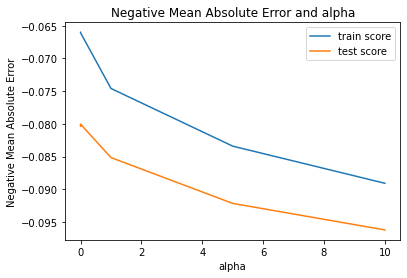

In [137]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

From above plot of different alphas and the corresponding negative mean square error, we see that the good value of alpha in test score is at around very small value of alpha. We will check the near by values of alpha and select the one which balances the negative mean square error as well as the r2_score of the model.

###### Checking alpha = 1.0

In [138]:
# Checking with alpha = 1.0
alpha = 1.0
ridge_rfe_1 = Ridge(alpha=alpha,normalize=True)

ridge_rfe_1.fit(X_train_ridge_rfe, y_train)
ridge_rfe_1.coef_

array([-0.02611426,  0.24577908,  0.28552051,  0.11878411,  0.1394479 ,
        0.13177902,  0.19006889,  0.03058078,  0.30463882,  0.0818511 ,
        0.29603744,  0.09882305,  0.37024141,  0.08274505,  0.13895405,
        0.0611322 , -0.14682587,  0.19255975,  0.13734002,  0.16249246,
        0.09891233, -0.01075157,  0.05468367,  0.0619335 , -0.1125491 ,
        0.02699649,  0.01261106,  0.02767651, -0.02513123, -0.04222936,
        0.02339768,  0.01404214,  0.01125249, -0.08224404,  0.03521616,
       -0.06182178,  0.05073122,  0.08181618, -0.05054517, -0.07252887,
       -0.09168868,  0.077188  ,  0.06963119,  0.0058413 ,  0.04270186,
        0.06939813,  0.04347426,  0.03396182,  0.05883899, -0.03669722,
        0.02285452,  0.00881581,  0.04485987,  0.11649949, -0.54164986,
       -0.04567102,  0.02947596, -0.04318742, -0.01137294, -0.00692876,
        0.00768686,  0.00394898,  0.09546272, -0.03436987,  0.02291912,
        0.01684943,  0.11367575, -0.13709981,  0.04536384,  0.07

In [139]:
print("\n"+start+"R2 score for alpha = 1.0 : "+end+"\n")
pred_train_rr= ridge_rfe_1.predict(X_train_ridge_rfe)
print("For Train set : ")
print(round(r2_score(y_train, pred_train_rr),2))

# Creating X_test_rfe dataframe by dropping variables from X_test
X_test_ridge_rfe = X_test[X_train_ridge_rfe.columns]

pred_test_rr= ridge_rfe_1.predict(X_test_ridge_rfe)
print("For Test set : ")
print(round(r2_score(y_test, pred_test_rr),2))


R2 score for alpha = 1.0 : 

For Train set : 
0.9
For Test set : 
0.84


###### Checking alpha = 0.1

In [140]:
# Checking with alpha = 0.1
alpha = 0.1
ridge_rfe_2 = Ridge(alpha=alpha,normalize=True)

ridge_rfe_2.fit(X_train_ridge_rfe, y_train)
ridge_rfe_2.coef_

array([-5.46883121e-02,  3.18461664e-01,  4.04299777e-01,  2.70855287e-01,
        1.06592992e-01,  8.36041508e-02,  2.66896932e-01,  2.06183401e-02,
        3.94368107e-01,  6.75401944e-02,  4.65344647e-01,  1.76148060e-01,
        6.13099738e-01,  1.17287284e-01,  1.02234527e-01,  5.53932577e-02,
       -1.98525202e-01,  1.75117422e-01,  1.16070176e-01,  1.42082783e-01,
        8.08597881e-02,  2.04625576e-02,  6.54814519e-02,  7.31749037e-02,
       -2.27996948e-01,  4.75574083e-02,  7.61335675e-02,  6.20255472e-02,
        3.18533956e-02, -1.25528574e-02,  2.06614567e-02,  9.24583642e-04,
        2.37716408e-02, -1.17754610e-01,  3.41006800e-02, -7.51850529e-02,
        8.38389492e-02,  1.31543044e-01, -4.43371471e-02, -7.46507034e-02,
       -1.15402161e-01,  4.96504635e-02,  8.76023740e-02,  4.03125541e-02,
        8.19785388e-02,  9.87903503e-02,  3.98644559e-02,  5.71574907e-02,
        6.04961748e-02, -4.75000340e-02,  4.36817580e-02,  4.07661617e-02,
        3.35679346e-02,  

In [141]:
print("\n"+start+"R2 score for alpha = 0.1 : "+end+"\n")

pred_train_rr= ridge_rfe_2.predict(X_train_ridge_rfe)
print("For Train set : ")
print(round(r2_score(y_train, pred_train_rr),2))

# Creating X_test_rfe dataframe by dropping variables from X_test
X_test_ridge_rfe = X_test[X_train_ridge_rfe.columns]

pred_test_rr= ridge_rfe_2.predict(X_test_ridge_rfe)
print("For Test set : ")
print(round(r2_score(y_test, pred_test_rr),2))


R2 score for alpha = 0.1 : 

For Train set : 
0.94
For Test set : 
0.75


From two values of alpha i.e. 1.0 and 0.1, we see that the negative mean square value for 0.1 is 0.080 while for 1.0 it is around 0.085. Clearly for 0.1, the negative mean square error is better, but the R2 score is not that impressive at that the same point. For alpha = 1.0, the R2 score looks more promising than that of alpha=0.1 with just 0.005 increase in negative mean square error.

So, we will choose <b> `optimum value for alpha as 1.0` </b> for ridge regression with RFE performed on features.

We have seen that the ridge is performing quite good with alpha =1.0 after we perform RFE before feeding the features to Model. We can also check ridge model building without doing RFE on the features.

#### `Using X without RFE`

In [142]:
# list of alphas to tune
params = {'alpha': [1e-15, 1e-10, 1e-8, 1e-4, 1e-3,1e-2, 1, 5, 10]}


ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:    0.8s finished


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.0001, 0.001, 0.01, 1,
                                   5, 10]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [143]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.033112,0.003537,0.004386,0.001198,1e-15,{'alpha': 1e-15},-0.098008,-0.097564,-0.099865,-0.089514,-0.090354,-0.095061,0.004265,7,-0.056428,-0.057813,-0.057778,-0.058673,-0.057007,-0.057540,0.000766
1,0.007581,0.001353,0.002990,0.000631,1e-10,{'alpha': 1e-10},-0.095564,-0.093915,-0.095037,-0.088807,-0.086896,-0.092043,0.003516,4,-0.056428,-0.057813,-0.057778,-0.058673,-0.057007,-0.057540,0.000766
2,0.010373,0.000488,0.003987,0.001092,1e-08,{'alpha': 1e-08},-0.095564,-0.093917,-0.095037,-0.088807,-0.086895,-0.092044,0.003517,5,-0.056428,-0.057813,-0.057778,-0.058673,-0.057007,-0.057540,0.000766
3,0.009176,0.003178,0.004389,0.001742,0.0001,{'alpha': 0.0001},-0.095088,-0.093914,-0.095065,-0.088749,-0.086795,-0.091922,0.003471,3,-0.056448,-0.057814,-0.057786,-0.058695,-0.057032,-0.057555,0.000764
4,0.009176,0.001716,0.003989,0.000631,0.001,{'alpha': 0.001},-0.093463,-0.093883,-0.095188,-0.088515,-0.086399,-0.091489,0.003408,2,-0.056529,-0.057823,-0.057820,-0.058792,-0.057135,-0.057620,0.000759


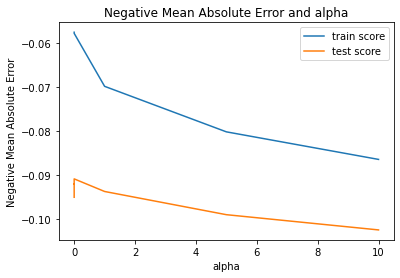

In [144]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

From above plot of different alphas and the corresponding negative mean square error, we see that the good value of alpha in test score is at around very small value of alpha. We will check the near by values of alpha and select the one which balances the negative mean square error as well as the r2_score of the model.

###### Checking alpha = 1.0

In [145]:
alpha = 1.0
ridge_1 = Ridge(alpha=alpha,normalize=True)

ridge_1.fit(X_train, y_train)
ridge_1.coef_

array([-2.38221824e-02,  1.01159978e-01,  2.22218196e-01,  2.23567398e-01,
        1.35001805e-01,  7.44922890e-02,  9.92072341e-02,  8.90033800e-02,
        1.63291231e-01,  2.91376772e-02,  2.50557877e-02,  2.60570569e-01,
        5.71821763e-02,  2.74728479e-01,  7.22885400e-02,  5.19777849e-03,
        3.12067478e-01,  6.86731127e-02,  3.33263123e-03,  1.02428179e-01,
        4.45372197e-02,  9.10916689e-02, -8.24732444e-02,  0.00000000e+00,
        1.62244447e-01,  6.52082163e-02,  9.90050660e-02,  1.24867198e-01,
        8.07434943e-02,  5.61266179e-02, -1.79170184e-03,  5.74395722e-02,
        4.84440280e-02, -8.09770266e-03,  1.94439405e-02,  2.44031843e-03,
       -5.81187836e-02,  2.66835582e-02,  1.36999449e-02,  2.31206739e-02,
       -2.04477795e-02,  6.52711495e-02,  7.84593198e-03,  2.96688639e-02,
        1.48246911e-02, -4.69980604e-02, -8.73910071e-03,  1.63027009e-02,
        1.77329198e-02,  8.56833492e-03, -1.03423921e-01,  2.95526147e-02,
       -2.05776310e-02, -

In [146]:
print("\n"+start+"R2 score for alpha = 1.0 : "+end+"\n")

pred_train_rr= ridge_1.predict(X_train)
print("For Train set : ")
print(round(r2_score(y_train, pred_train_rr),2))


pred_test_rr= ridge_1.predict(X_test)
print("For Test set : ")
print(round(r2_score(y_test, pred_test_rr),2))



R2 score for alpha = 1.0 : 

For Train set : 
0.91
For Test set : 
0.84


###### Checking alpha = 0.1

In [147]:
alpha = 0.1
ridge_2 = Ridge(alpha=alpha,normalize=True)

ridge_2.fit(X_train, y_train)
ridge_2.coef_

array([-3.80601765e-02,  1.11164098e-01,  4.29058901e-01,  3.54538007e-01,
        2.91015197e-01,  4.02090150e-02,  6.14988093e-02,  9.48203056e-02,
        3.01384489e-01,  5.49411984e-02,  2.73701574e-02,  4.34455748e-01,
        4.94306252e-02,  4.70945573e-01,  1.34832293e-01, -1.30833120e-02,
        5.52057665e-01,  8.88896572e-02, -4.31976211e-03,  8.55718357e-02,
        4.70450031e-02,  5.97373688e-02, -1.98733939e-01,  0.00000000e+00,
        1.43979043e-01,  3.83572564e-02,  9.48699838e-02,  1.40044729e-01,
        7.86746344e-02,  5.49969508e-02,  1.92583833e-02,  8.28992608e-02,
        6.39103984e-02,  6.22129051e-02,  7.40015711e-02, -3.90939795e-04,
       -1.28278180e-01,  4.97846004e-02,  6.90161533e-02,  5.73981463e-02,
        2.80639043e-02,  1.07333922e-01,  1.02322481e-02,  5.57945018e-02,
        1.32418870e-02, -1.81370814e-02,  3.06817761e-03,  1.37874812e-02,
       -5.35141408e-03,  1.74196624e-02, -1.13379899e-01,  3.37126823e-02,
       -4.14955985e-02, -

In [148]:
print("\n"+start+"R2 score for alpha = 0.1 : "+end+"\n")
pred_train_rr= ridge_2.predict(X_train)
print("For Train set : ")
print(round(r2_score(y_train, pred_train_rr),2))

pred_test_rr= ridge_2.predict(X_test)
print("For Test set : ")
print(round(r2_score(y_test, pred_test_rr),2))


R2 score for alpha = 0.1 : 

For Train set : 
0.95
For Test set : 
0.73


From two values of alpha i.e. 1.0 and 0.1, we see that the negative mean square value for 0.1 is 0.090 while for 1.0 it is around 0.095. Clearly for 0.1, the negative mean square error is better, but the R2 score is not that impressive at that the same point. For alpha = 1.0, the R2 score looks more promising than that of alpha=0.1 with just 0.005 increase in negative mean square error.

So, as observed, when we are performing feature selection using RFE before hand, we are getting a better model with less negative mean square error and same alpha.

Hence, we will go with RFE selected feature model.

`so, the final set of features with coefficients are :`

In [149]:
# ridge model parameters
model_parameters = list(ridge_rfe_1.coef_)
model_parameters.insert(0, ridge_rfe_1.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X_test_ridge_rfe.columns
cols = cols.insert(0, "constant")

Feature_Coef = pd.DataFrame({'Features': cols,
     'Coefficients': model_parameters
    })

Feature_Coef.sort_values(by='Coefficients',ascending=False)

,Features,Coefficients
0,constant,10.890
13,GrLivArea,0.370
9,TotalBsmtSF,0.305
11,1stFlrSF,0.296
3,OverallQual,0.286
2,LotArea,0.246
18,TotRmsAbvGrd,0.193
7,BsmtFinSF1,0.190
20,GarageArea,0.162
5,ExterQual,0.139


From our final Ridge model, we can draw final conclusions :

1. The optimal alpha value is 1.0 with Negative Mean square error as 0.085
2. The R2 score for Train set is 0.90 and for Test set is 0.84
3. The top 5 features are :
<b>PoolQC_Gd</b>, 
<b>Condition2_PosN</b>, 
<b>GrLivArea</b>,
<b>TotalBsmtSF</b>,
<b>1stFlrSF</b>
4. These top five features affect the Saleprice in following manner :
    $ SalePrice = -(0.808  \times  PoolQC_Gd)  - (0.542 \times Condition2_PosN) + (0.370 \times GrLivArea) + (0.305\times TotalBsmtSF) + (0.296\times 1stFlrSF) $

So, from the equation we can recomend that : <br>
- With every one unit decrease in `PoolQC_Gd i.e. Good Pool Condition`, the SalePrice decreases by `0.808`
- With every one unit decrease in `Condition2_PosN i.e. Proximity to near positive off-site feature--park, greenbelt, etc.`, the SalePrice decreases by `0.542`
- With every one unit increase in `GrLivArea i.e. Ground Living Area Square feet`, the SalePrice increases by `0.370`
- With every one unit increase in `TotalBsmtSF i.e. Total square feet of basement area`, the SalePrice increases by `0.305`
- With every one unit increase in `1stFlrSF i.e. First Floor square feet`, the SalePrice increases by `0.296`

### `Lasso Regression`

We will first try and tune the model with different values of alpha to see the one which gives good model i.e with minimum error and high robustness.

#### `Using X with 100 features after performing RFE`

In [150]:
# list of alphas to tune
params = {'alpha': [1e-20,1e-15, 1e-10, 1e-8, 1e-5,1e-4, 1e-3,1e-2, 1, 5, 10]}


lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train_lasso_rfe, y_train) 

Fitting 5 folds for each of 11 candidates, totalling 55 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  55 out of  55 | elapsed:    1.7s finished


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-20, 1e-15, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 1, 5, 10]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [151]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.062632,0.005964,0.003191,7.466716e-04,1e-20,{'alpha': 1e-20},-0.175664,-0.198860,-0.192556,-0.172170,-0.181684,-0.184187,0.010086,7,-0.159014,-0.154219,-0.156663,-0.160842,-0.160450,-0.158238,0.002486
1,0.058937,0.003199,0.002194,1.827659e-03,1e-15,{'alpha': 1e-15},-0.175664,-0.198860,-0.192556,-0.172170,-0.181684,-0.184187,0.010086,6,-0.159014,-0.154219,-0.156663,-0.160842,-0.160450,-0.158238,0.002486
2,0.050465,0.008117,0.001995,5.642013e-07,1e-10,{'alpha': 1e-10},-0.175664,-0.198859,-0.192556,-0.172170,-0.181684,-0.184187,0.010086,5,-0.159014,-0.154219,-0.156663,-0.160842,-0.160450,-0.158238,0.002486
3,0.051116,0.006994,0.003735,5.976051e-03,1e-08,{'alpha': 1e-08},-0.175663,-0.198857,-0.192555,-0.172163,-0.181685,-0.184185,0.010087,4,-0.159015,-0.154219,-0.156664,-0.160842,-0.160450,-0.158238,0.002486
4,0.035204,0.014336,0.000399,7.975578e-04,1e-05,{'alpha': 1e-05},-0.175327,-0.198378,-0.191883,-0.171027,-0.181523,-0.183628,0.010177,3,-0.159170,-0.154322,-0.156819,-0.161022,-0.160507,-0.158368,0.002491


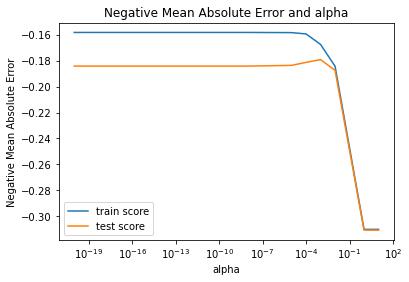

In [152]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.xscale('log') 

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='lower left')
plt.show()

###### Checking alpha = 0.0001

In [153]:
alpha =0.0001

lasso_rfe_1 = Lasso(alpha=alpha,normalize=True)
        
lasso_rfe_1.fit(X_train_lasso_rfe, y_train)

lasso_rfe_1.coef_

array([-1.53515101e-02, -8.00952676e-02,  0.00000000e+00, -6.97120343e-02,
        2.82970692e-02, -1.13188908e-01,  0.00000000e+00,  0.00000000e+00,
       -3.65406918e-03, -2.28160351e-02,  1.29351870e-01, -0.00000000e+00,
        2.79156218e-01,  2.15454536e-01,  1.01046566e-02, -2.57683650e-02,
       -3.42442956e-01,  6.12417621e-03,  1.49972594e-01,  9.12909767e-03,
       -2.34100576e-02, -1.06959022e-01, -9.57113479e-03,  9.47326397e-02,
        8.19928820e-04, -0.00000000e+00, -7.18813963e-03, -1.83621327e-02,
        1.81522052e-02,  4.93692666e-03, -0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00, -5.95541852e-03, -0.00000000e+00,  1.40407646e-01,
       -1.21442226e-01,  1.17694227e-01,  0.00000000e+00,  1.24931080e-01,
        0.00000000e+00, -2.84290278e-02,  0.00000000e+00,  6.33590878e-02,
       -2.19602244e-01, -0.00000000e+00, -0.00000000e+00,  8.04453623e-02,
        0.00000000e+00,  0.00000000e+00, -1.30537266e-01, -0.00000000e+00,
       -2.45730992e-01, -

In [154]:
print("\n"+start+"R2 score for alpha = 0.0001 : "+end+"\n")
pred_train_lasso= lasso_rfe_1.predict(X_train_lasso_rfe)
print("For Train set : ")
print(round(r2_score(y_train, pred_train_lasso),2))

# Creating X_test_rfe dataframe by dropping variables from X_test
X_test_lasso_rfe = X_test[X_train_lasso_rfe.columns]

print("For Test set : ")
pred_test_lasso= lasso_rfe_1.predict(X_test_lasso_rfe)
print(round(r2_score(y_test, pred_test_lasso),2))


R2 score for alpha = 0.0001 : 

For Train set : 
0.7
For Test set : 
0.61


###### Checking alpha = 0.001

In [155]:
alpha =0.001

lasso_rfe_2 = Lasso(alpha=alpha,normalize=True)
        
lasso_rfe_2.fit(X_train_lasso_rfe, y_train)

lasso_rfe_2.coef_

array([-0.00000000e+00, -0.00000000e+00,  0.00000000e+00, -5.38581923e-02,
        2.33006593e-03, -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -0.00000000e+00,  1.66301832e-01, -0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00,  9.14965493e-02,  0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,  1.05165140e-01,
        0.00000000e+00, -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00, -0.00000000e+00,  9.14737968e-02,
       -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,  3.75057444e-02,
       -0.00000000e+00, -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
       -2.17655959e-01, -

In [156]:
print("\n"+start+"R2 score for alpha = 0.001 : "+end+"\n")
pred_train_lasso= lasso_rfe_2.predict(X_train_lasso_rfe)
print("For Train set : ")
print(round(r2_score(y_train, pred_train_lasso),2))

# Creating X_test_rfe dataframe by dropping variables from X_test
X_test_lasso_rfe = X_test[X_train_lasso_rfe.columns]

print("For Test set : ")
pred_test_lasso= lasso_rfe_2.predict(X_test_lasso_rfe)
print(round(r2_score(y_test, pred_test_lasso),2))


R2 score for alpha = 0.001 : 

For Train set : 
0.62
For Test set : 
0.55


From two values of alpha i.e. 0.0001 and 0.001, we see that the negative mean square value is at around 0.19 for both 0.0001 and 0.001. <br/>
For alpha = 0.0001, the R2 score looks more promising than that of alpha=0.001.

So, we will choose <b> `optimum value for alpha as 0.0001` </b> for lasso regression with RFE performed on features.

We have seen that the lasso is performing quite good with alpha =0.0001 after we perform RFE before feeding the features to Model. We can also check lasso model building without doing RFE on the features.

#### `Using X without RFE`

In [157]:
# list of alphas to tune
params = {'alpha': [1e-20,1e-15, 1e-10, 1e-8, 1e-5,1e-4, 1e-3,1e-2, 1, 5, 10]}


lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 11 candidates, totalling 55 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  55 out of  55 | elapsed:    3.6s finished


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-20, 1e-15, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 1, 5, 10]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [158]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.129743,0.009917,0.003391,0.002054,1e-20,{'alpha': 1e-20},-0.093083,-0.094125,-0.095527,-0.087473,-0.086473,-0.091336,0.003660,7,-0.056542,-0.057816,-0.057833,-0.058862,-0.057163,-0.057643,0.000774
1,0.103765,0.008474,0.003790,0.000747,1e-15,{'alpha': 1e-15},-0.093083,-0.094125,-0.095527,-0.087473,-0.086473,-0.091336,0.003660,6,-0.056542,-0.057816,-0.057833,-0.058862,-0.057163,-0.057643,0.000774
2,0.100252,0.016645,0.000599,0.001197,1e-10,{'alpha': 1e-10},-0.093083,-0.094125,-0.095527,-0.087473,-0.086473,-0.091336,0.003660,5,-0.056542,-0.057816,-0.057833,-0.058862,-0.057163,-0.057643,0.000774
3,0.112849,0.025964,0.002992,0.001892,1e-08,{'alpha': 1e-08},-0.093082,-0.094114,-0.095515,-0.087462,-0.086470,-0.091328,0.003658,4,-0.056542,-0.057816,-0.057833,-0.058862,-0.057163,-0.057643,0.000774
4,0.101989,0.026239,0.002593,0.002326,1e-05,{'alpha': 1e-05},-0.091928,-0.092074,-0.094016,-0.084907,-0.082175,-0.089020,0.004616,2,-0.057016,-0.058157,-0.058271,-0.059163,-0.057575,-0.058036,0.000720


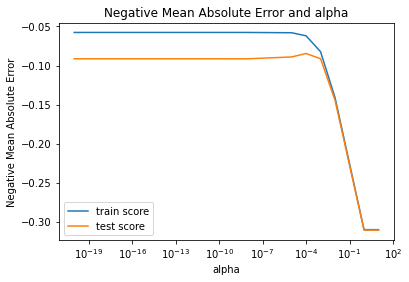

In [159]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.xscale('log') 

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='lower left')
plt.show()

###### Checking alpha = 0.0001

In [160]:
# for alpha = 0.0001
alpha =0.0001

lasso_1 = Lasso(alpha=alpha,normalize=True)
        
lasso_1.fit(X_train, y_train)

lasso_1.coef_

array([-3.59838187e-02,  1.01061016e-01,  3.33063860e-01,  4.90724708e-01,
        3.40517201e-01,  1.64797434e-02,  6.02707844e-02,  1.81522257e-02,
        2.97902311e-01,  0.00000000e+00, -0.00000000e+00,  5.16158779e-01,
        4.08781831e-02,  3.84905378e-02,  0.00000000e+00, -5.52644676e-02,
        1.45211636e+00,  9.78831952e-02, -0.00000000e+00,  1.77722202e-02,
        1.54536899e-02,  0.00000000e+00, -1.75672640e-01,  0.00000000e+00,
        3.09308785e-02,  1.18184538e-02,  9.75163273e-02,  1.25973802e-01,
        5.77547694e-02,  3.59780779e-02,  0.00000000e+00,  7.46466040e-03,
        4.20518251e-02, -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
       -2.77610589e-01,  8.26622234e-03,  2.67554208e-02,  4.07114662e-02,
       -0.00000000e+00,  8.40647439e-02,  0.00000000e+00,  1.03769675e-02,
        5.43941263e-04, -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00, -1.08765438e-02,  2.69619411e-02,
       -0.00000000e+00,  

In [161]:
print("\n"+start+"R2 score for alpha = 0.0001 : "+end+"\n")
pred_train_lasso= lasso_1.predict(X_train)
print("For Train set : ")
print(round(r2_score(y_train, pred_train_lasso),2))

print("For Test set : ")
pred_test_lasso= lasso_1.predict(X_test)
print(round(r2_score(y_test, pred_test_lasso),2))


R2 score for alpha = 0.0001 : 

For Train set : 
0.94
For Test set : 
0.66


###### Checking alpha = 0.001

In [162]:
alpha =0.001

lasso_2 = Lasso(alpha=alpha,normalize=True)
        
lasso_2.fit(X_train, y_train)

lasso_2.coef_

array([-0.00000000e+00,  0.00000000e+00,  1.15951213e-02,  7.94247077e-01,
        4.65584849e-03,  0.00000000e+00,  7.61525086e-02,  1.15503797e-01,
        8.20677517e-02,  0.00000000e+00, -0.00000000e+00,  1.62319668e-01,
        4.87994915e-02,  2.01506309e-01,  0.00000000e+00, -0.00000000e+00,
        9.85960040e-01,  4.58729032e-02,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  6.47917145e-02,  1.55158749e-01,  1.28422155e-01,
        1.81214215e-02,  0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -1.42092418e-01,  0.00000000e+00, -0.00000000e+00,  1.36788823e-02,
       -3.43664961e-02,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00,  

In [163]:
print("\n"+start+"R2 score for alpha = 0.001 : "+end+"\n")
pred_train_lasso= lasso_2.predict(X_train)
print("For Train set : ")
print(round(r2_score(y_train, pred_train_lasso),2))

print("For Test set : ")
pred_test_lasso= lasso_2.predict(X_test)
print(round(r2_score(y_test, pred_test_lasso),2))


R2 score for alpha = 0.001 : 

For Train set : 
0.85
For Test set : 
0.8


From two values of alpha i.e. 0.0001 and 0.001, we see that the negative mean square value is around 0.09 for both.<br/>
For alpha = 0.001, the R2 score looks more promising than that of alpha=0.0001.

So, as observed, when we are performing feature selection using RFE before hand, we are getting a model with low R2 Score.

Hence, we will go without RFE selected feature model.

`so, the final set of features with coefficients are :`

In [164]:
# lasso model parameters
model_parameters = list(lasso_2.coef_)
model_parameters.insert(0, lasso_2.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X_test.columns
cols = cols.insert(0, "constant")
    
# list(zip(cols, model_parameters))

Feature_Coef_Lasso = pd.DataFrame({'Features': cols,
     'Coefficients': model_parameters
    })

Feature_Coef_Lasso=Feature_Coef_Lasso[Feature_Coef_Lasso['Coefficients']!= 0.0]

Feature_Coef_Lasso.sort_values(by='Coefficients',ascending=False)

,Features,Coefficients
0,constant,10.971
17,GrLivArea,0.986
4,OverallQual,0.794
14,1stFlrSF,0.202
12,TotalBsmtSF,0.162
27,GarageCars,0.155
28,GarageArea,0.128
8,BsmtQual,0.116
9,BsmtFinSF1,0.082
7,ExterQual,0.076


From our final Lasso model, we can draw final conclusions :

1. The optimal alpha value is 0.001 with Negative Mean square error between 0.09-0.095.
2. The R2 score for Train set is 0.85 and for Test set is 0.80
3. The top 5 features are :<br/>
<b>GrLivArea</b><br/>
<b>PoolQC_Gd</b><br/> 
<b>OverallQual</b><br/>
<b>Condition2_PosN</b><br/>
<b>1stFlrSF</b>
4. These top five features affect the Saleprice in following manner :
    $ SalePrice = (0.986  \times  GrLivArea)  - (0.831 \times PoolQC_Gd) + (0.794 \times OverallQual) - (0.217\times Condition2_PosN) + (0.202\times 1stFlrSF) $

So, from the equation we can recomend that : <br>
- With every one unit increase in `GrLivArea i.e. Ground Living Area Square feet`, the SalePrice increases by `0.986`
- With every one unit decrease in `PoolQC_Gd i.e. Good Pool Condition`, the SalePrice decreases by `0.831`
- With every one unit increase in `OverallQual i.e. Overall Quality`, the SalePrice increases by `0.794`
- With every one unit decrease in `Condition2_PosN i.e. Proximity to near positive off-site feature--park, greenbelt, etc.`, the SalePrice decreases by `0.217`
- With every one unit increase in `1stFlrSF i.e. First Floor square feet`, the SalePrice increases by `0.202`

### Summary

As we have seen from the above model conslusions, we have Ridge and Lasso models with below results :

### ` Ridge : `
##### R2 Score : <br/>

Train : 0.90<br/>
Test : 0.84<br/>
Negative Mean Square Error : 0.085<br/>
Alpha : 1.0<br/>


### ` Lasso : `
##### R2 Score : <br/>

Train : 0.85<br/>
Test : 0.80<br/>
Negative Mean Square Error : 0.09-0.095<br/>
Alpha : 0.001<br/>


### Subjective Questions

##### 1. What is the optimal value of alpha for ridge and lasso regression? What will be the changes in the model if you choose double the value of alpha for both ridge and lasso? What will be the most important predictor variables after the change is implemented?

The optimal value for Ridge is 1.0 and for Lasso is 0.001

We will change the balues of alpha to 2.0 and 0.002 for Ridge and Lasso respectively and see the effect of it on model.

#### `Ridge Regression`

In [165]:
# Checking with alpha = 2.0
alpha = 2.0
ridge_rfe_1 = Ridge(alpha=alpha,normalize=True)

ridge_rfe_1.fit(X_train_ridge_rfe, y_train)
ridge_rfe_1.coef_


array([-1.77394371e-02,  2.09753772e-01,  2.36882978e-01,  6.84569211e-02,
        1.30230944e-01,  1.24165370e-01,  1.66396200e-01,  3.24291870e-02,
        2.77317021e-01,  7.61545867e-02,  2.52738003e-01,  7.92760363e-02,
        3.06933094e-01,  6.61901269e-02,  1.25750767e-01,  5.45376096e-02,
       -1.18208395e-01,  1.66191723e-01,  1.29544823e-01,  1.54459435e-01,
        9.40616085e-02, -2.03439417e-02,  4.54284953e-02,  5.24526425e-02,
       -9.80563671e-02,  2.31319483e-02, -8.18373830e-05,  2.53264384e-02,
       -2.84389843e-02, -3.00033442e-02,  2.20485821e-02,  1.41549633e-02,
        6.07870884e-03, -5.60252029e-02,  3.08028360e-02, -5.39635043e-02,
        3.72503616e-02,  5.93750950e-02, -4.44738255e-02, -6.30904160e-02,
       -7.60021045e-02,  7.22231763e-02,  6.00316661e-02, -1.88554853e-03,
        3.35737537e-02,  5.57783450e-02,  3.96946907e-02,  2.51305264e-02,
        4.85055517e-02, -3.03586658e-02,  1.35070796e-02, -6.97791986e-03,
        3.50100577e-02,  

In [166]:
print("\n"+start+"R2 score for alpha = 2.0 : "+end+"\n")
pred_train_rr= ridge_rfe_1.predict(X_train_ridge_rfe)
print("For Train set : ")
print(round(r2_score(y_train, pred_train_rr),2))

pred_test_rr= ridge_rfe_1.predict(X_test_ridge_rfe)
print("For Test set : ")
print(round(r2_score(y_test, pred_test_rr),2))


R2 score for alpha = 2.0 : 

For Train set : 
0.86
For Test set : 
0.82


In [167]:
# ridge model parameters
model_parameters = list(ridge_rfe_1.coef_)
model_parameters.insert(0, ridge_rfe_1.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X_test_ridge_rfe.columns
cols = cols.insert(0, "constant")
    
# list(zip(cols, model_parameters))

Feature_Coef_Ridge = pd.DataFrame({'Features': cols,
     'Coefficients': model_parameters
    })

Feature_Coef_Ridge.sort_values(by='Coefficients',ascending=False)

,Features,Coefficients
0,constant,11.075
13,GrLivArea,0.307
9,TotalBsmtSF,0.277
11,1stFlrSF,0.253
3,OverallQual,0.237
2,LotArea,0.210
7,BsmtFinSF1,0.166
18,TotRmsAbvGrd,0.166
20,GarageArea,0.154
5,ExterQual,0.130


So, after changing the alpha from 1.0 to 2.0 for Ridge regression we have following observation : 

1. The R2 score for Train set is 0.86 and for Test set is 0.82
2. The most predictor variables remains same :<br/>
<b>PoolQC_Gd</b><br/>
<b>Condition2_PosN</b><br/>
<b>GrLivArea</b><br/>
<b>TotalBsmtSF</b><br/>
<b>1stFlrSF</b><br/>
3. These top five features affect however has changed after doubling alpha in the following manner :
    $ SalePrice = -(0.487  \times  PoolQC_Gd)  - (0.319 \times Condition2_PosN) + (0.307 \times GrLivArea) + (0.277\times TotalBsmtSF) + (0.253\times 1stFlrSF) $

So, the coefficients have changed as follows : <br>
- `PoolQC_Gd i.e. Good Pool Condition` coefficient has increased from `-0.808` to `-0.487`
- `Condition2_PosN i.e. Proximity to near positive off-site feature--park, greenbelt, etc.`coefficient has increased from  `-0.542` to `-0.319`
- `GrLivArea i.e. Ground Living Area Square feet` coefficient has decreased from `0.370` to `0.307`
- `TotalBsmtSF i.e. Total square feet of basement area` coefficient has decreased from `0.305`to `0.277`
- `1stFlrSF i.e. First Floor square feet` coefficient has decreased from `0.296` to `0.253`

#### `Lasso Regression`

In [168]:
# Doubling the alpha

alpha =0.002

lasso_2 = Lasso(alpha=alpha,normalize=True)
        
lasso_2.fit(X_train, y_train)

lasso_2.coef_

array([-0.        ,  0.        ,  0.        ,  0.89518499,  0.        ,
        0.        ,  0.02680365,  0.08117837,  0.        ,  0.        ,
        0.        ,  0.0850897 ,  0.        ,  0.21124594,  0.        ,
       -0.        ,  0.74910796,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        , -0.        ,  0.        ,  0.        ,
        0.        ,  0.17564269,  0.07807056,  0.        ,  0.        ,
       -0.        ,  0.        ,  0.        , -0.        , -0.        ,
        0.        , -0.15206684,  0.        , -0.        ,  0.        ,
       -0.00287277,  0.        ,  0.        , -0.        ,  0.        ,
       -0.        , -0.        ,  0.        ,  0.        , -0.        ,
       -0.        ,  0.        , -0.        , -0.        , -0.        ,
        0.        ,  0.        , -0.        , -0.        , -0.        ,
        0.        ,  0.        ,  0.        , -0.        ,  0.        ,
       -0.        , -0.        ,  0.        , -0.        , -0.  

In [169]:
print("\n"+start+"R2 score for alpha = 0.002 : "+end+"\n")
pred_train_lasso= lasso_2.predict(X_train)
print("For Train set : ")
print(round(r2_score(y_train, pred_train_lasso),2))

print("For Test set : ")
pred_test_lasso= lasso_2.predict(X_test)
print(round(r2_score(y_test, pred_test_lasso),2))


R2 score for alpha = 0.002 : 

For Train set : 
0.77
For Test set : 
0.77


In [170]:
# lasso model parameters
model_parameters = list(lasso_2.coef_)
model_parameters.insert(0, lasso_2.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X_test.columns
cols = cols.insert(0, "constant")
    
# list(zip(cols, model_parameters))

Feature_Coef_Lasso = pd.DataFrame({'Features': cols,
     'Coefficients': model_parameters
    })

Feature_Coef_Lasso=Feature_Coef_Lasso[Feature_Coef_Lasso['Coefficients']!= 0.0]

Feature_Coef_Lasso.sort_values(by='Coefficients',ascending=False)

,Features,Coefficients
0,constant,11.174
4,OverallQual,0.895
17,GrLivArea,0.749
14,1stFlrSF,0.211
27,GarageCars,0.176
12,TotalBsmtSF,0.085
8,BsmtQual,0.081
28,GarageArea,0.078
7,ExterQual,0.027
41,MSZoning_RM,-0.003


So, after changing the alpha from 1.0 to 2.0 for Lasso regression we have following observation : 

1. The model has become sparser and have made most of the coefficients 0.
2. The R2 score is reduced from before i.e for Train set is 0.77 and for Test set is 0.77
3. The most predictor varibles have changed :<br/>
<b>OverallQual</b><br/>
<b>GrLivArea</b><br/>
<b>1stFlrSF</b><br/>
<b>GarageCars</b><br/>
<b>BuildingAge</b>

4. These top five features affect however has changed after doubling alpha in the following manner :
    $ SalePrice = (0.895  \times  OverallQual)  + (0.749 \times GrLivArea) + (0.211 \times 1stFlrSF) + (0.176\times GarageCars) -(0.152\times BuildingAge) $

So, from the equation we can recomend that : <br>

- With every one unit increase in `OverallQual i.e. Overall Quality`, the SalePrice increases by `0.895`
- With every one unit increase in `GrLivArea i.e. Ground Living Area Square feet`, the SalePrice increases by `0.749`
- With every one unit increase in `1stFlrSF i.e. First Floor square feet`, the SalePrice increases by `0.227`
- With every one unit increase in `GarageCars i.e. Size of Garage in Car capacity`, the SalePrice increases by `0.176`
- With every one unit decrease in `Buidling Age`, the SalePrice decreases by `0.152`


##### 3.After building the model, you realised that the five most important predictor variables in the lasso model are not available in the incoming data. You will now have to create another model excluding the five most important predictor variables. Which are the five most important predictor variables now?

So, the top five features we got from Lasso model are :<br/>
<b>GrLivArea</b><br/>
<b>PoolQC_Gd</b><br/> 
<b>OverallQual</b><br/>
<b>Condition2_PosN</b><br/>
<b>1stFlrSF</b>

We will now drop these top 5 variables and then build the model again.

In [171]:
X_new = X_train.drop(['GrLivArea','PoolQC_Gd','OverallQual','Condition2_PosN','1stFlrSF'],axis=1)

X_new.head()

,MSSubClass,LotFrontage,LotArea,OverallCond,MasVnrArea,ExterQual,BsmtQual,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,BuildingAge,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_No alley access,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtCond_Gd,BsmtCond_No Basement,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_No Basement,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_No Basement,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_No Basement,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_No Fireplace,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_No Garage,GarageFinish_No Garage,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_No Garage,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_No Garage,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,PoolQC_Fa,PoolQC_No Pool,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_No Fence,MiscFeature_None,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
210,0.058824,0.157534,0.020117,0.625,0.00,0.333333,0.6,0.082920,0.0,0.169521,0.141408,0.50,0.0000

In [172]:
alpha =0.001

lasso_new = Lasso(alpha=alpha,normalize=True)
        
lasso_new.fit(X_new, y_train)

lasso_new.coef_

array([-0.        ,  0.        ,  0.00182893,  0.06909345,  0.        ,
        0.30129439,  0.2290335 ,  0.        ,  0.        , -0.        ,
        0.60105039,  0.04976885,  0.02686637, -0.        ,  0.        ,
        0.        ,  0.16170185,  0.01872504,  0.        , -0.        ,
        0.        ,  0.43808709,  0.16660712,  0.22015012,  0.25862619,
        0.03574823,  0.        , -0.        ,  0.        ,  0.        ,
       -0.        , -0.        ,  0.        , -0.10770865,  0.        ,
        0.        ,  0.        , -0.02890913,  0.        ,  0.        ,
        0.        ,  0.        , -0.        , -0.        ,  0.        ,
        0.        , -0.        , -0.        ,  0.        , -0.        ,
        0.        , -0.        ,  0.        ,  0.        , -0.        ,
       -0.        , -0.        ,  0.        ,  0.        ,  0.01339137,
       -0.        , -0.        , -0.        , -0.        , -0.        ,
       -0.        , -0.        ,  0.        ,  0.02958231,  0.  

In [173]:
print("\n"+start+"R2 score for alpha = 0.001 : "+end+"\n")
pred_train_lasso= lasso_new.predict(X_new)
print("For Train set : ")
print(round(r2_score(y_train, pred_train_lasso),2))

# Creating X_test_rfe dataframe by dropping variables from X_test
X_test_new = X_test[X_new.columns]

print("For Test set : ")
pred_test_lasso= lasso_new.predict(X_test_new)
print(round(r2_score(y_test, pred_test_lasso),2))


R2 score for alpha = 0.001 : 

For Train set : 
0.8
For Test set : 
0.8


In [174]:
# lasso model parameters
model_parameters = list(lasso_new.coef_)
model_parameters.insert(0, lasso_new.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X_test_new.columns
cols = cols.insert(0, "constant")
    
# list(zip(cols, model_parameters))

Feature_Coef_Lasso = pd.DataFrame({'Features': cols,
     'Coefficients': model_parameters
    })

Feature_Coef_Lasso=Feature_Coef_Lasso[Feature_Coef_Lasso['Coefficients']!= 0.0]

Feature_Coef_Lasso.sort_values(by='Coefficients',ascending=False)

,Features,Coefficients
0,constant,11.035
11,TotalBsmtSF,0.601
22,TotRmsAbvGrd,0.438
6,ExterQual,0.301
25,GarageArea,0.259
7,BsmtQual,0.229
24,GarageCars,0.220
23,Fireplaces,0.167
17,FullBath,0.162
4,OverallCond,0.069


So, after removing the first five top predictor variables, we have now got the following result:

1. The R2 score for Train set is 0.79 and for Test set is 0.80
2. The most predictor variables have changed :<br/>
<b>TotalBsmtSF</b><br/>
<b>TotRmsAbvGrd</b><br/>
<b>ExterQual</b><br/>
<b>GarageArea</b><br/>
<b>BsmtQual</b>

3. These top five features affect the SalePrice in the following manner :
    $ SalePrice = (0.601  \times  TotalBsmtSF)  + (0.438 \times TotRmsAbvGrd) + (0.301 \times ExterQual) + (0.259\times GarageArea) +(0.229\times BsmtQual) $

So, from the equation we can recomend that : <br>

- With every one unit increase in `TotalBsmtSF i.e. Total square feet of basement area`, the SalePrice increases by `0.601`
- With every one unit increase in `TotRmsAbvGrd i.e. Total rooms above grade`, the SalePrice increases by `0.438`
- With every one unit increase in `ExterQual i.e. quality of the material on the exterior`, the SalePrice increases by `0.301`
- With every one unit increase in `GarageArea i.e. Size of garage in square feet`, the SalePrice increases by `0.259`
- With every one unit increase in `BsmtQual i.e. height of the basement`, the SalePrice increase by `0.229`